<a href="https://colab.research.google.com/github/TasnimNishat-Dev/heart-disease-prediction/blob/main/Heart_disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [8]:
# loading the diabetes dataset to a pandas DataFrame
stroke_dataset = pd.read_csv('/content/stroke_final.csv')

In [9]:
pd.read_csv?

In [10]:
# printing the first 5 rows of the dataset
stroke_dataset.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
1,1,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
2,2,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
3,3,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
4,4,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [11]:
# number of rows and Columns in this dataset
stroke_dataset.shape

(303, 15)

In [12]:
# getting the statistical measures of the data
stroke_dataset.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
stroke_dataset['target'].value_counts()

,count
target,
1,165
0,138


0 = No heart disease detected

1 = Presence of heart disease

In [16]:
stroke_dataset.groupby('target').mean()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,,
0,145.601449,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,155.515152,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [17]:
# separating the data and labels
X = stroke_dataset.drop(columns = 'target', axis=1)
Y = stroke_dataset['target']

In [18]:
print(X)

     Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             0   67    1   0       100   299    0        0      125      1   
1             1   46    0   1       105   204    0        1      172      0   
2             2   53    0   0       130   264    0        0      143      0   
3             3   50    1   2       129   196    0        1      163      0   
4             4   67    1   0       160   286    0        0      108      1   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         298   51    0   2       120   295    0        0      157      0   
299         299   59    1   0       110   239    0        0      142      1   
300         300   35    1   1       122   192    0        1      174      0   
301         301   62    1   2       130   231    0        1      146      0   
302         302   51    0   2       140   308    0        0      142      0   

     oldpeak  slope  ca  thal  
0        0.9      1

In [19]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
298    1
299    0
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64


Data Standardization

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
standardized_data = scaler.transform(X)

In [23]:
print(standardized_data)

[[-1.72634387  1.39335191  0.68100522 ... -0.64911323  1.24459328
  -0.51292188]
 [-1.71491113 -0.92271345 -1.46841752 ...  0.97635214 -0.71442887
  -0.51292188]
 [-1.70347839 -0.15069166 -1.46841752 ... -0.64911323 -0.71442887
  -0.51292188]
 ...
 [ 1.70347839 -2.13589054  0.68100522 ...  0.97635214 -0.71442887
  -0.51292188]
 [ 1.71491113  0.84190778  0.68100522 ... -0.64911323  2.22410436
   1.12302895]
 [ 1.72634387 -0.37126932 -1.46841752 ...  0.97635214  0.26508221
  -0.51292188]]


In [25]:
X = standardized_data
Y = stroke_dataset['target']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(303, 14) (242, 14) (61, 14)


Training the Model

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [30]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8512396694214877


In [32]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8688524590163934


Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [35]:
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[21  7]
 [ 1 32]]


In [36]:
print(classification_report(Y_test, X_test_prediction, digits=5))

              precision    recall  f1-score   support

           0    0.95455   0.75000   0.84000        28
           1    0.82051   0.96970   0.88889        33

    accuracy                        0.86885        61
   macro avg    0.88753   0.85985   0.86444        61
weighted avg    0.88204   0.86885   0.86645        61



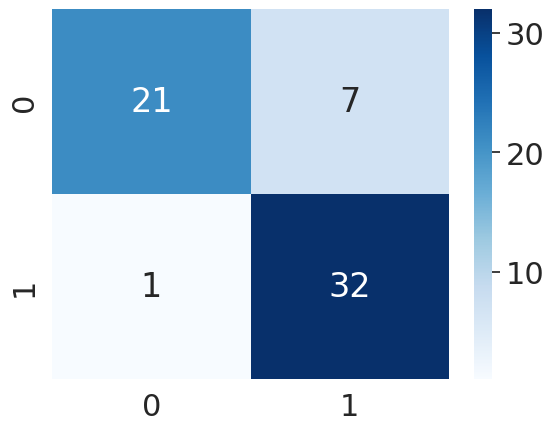

In [37]:
y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [38]:
print('Patient with Not Heart Disease Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Heart Disease Patient Missed (False Negatives): ', cm[1][0])
print('Heart Disease Detected (True Positives): ', cm[1][1])
print('Total Heart Disease: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Patient with Not Heart Disease Correctly Detected (True Negatives):  21
Incorrectly Detected (False Positives):  7
Heart Disease Patient Missed (False Negatives):  1
Heart Disease Detected (True Positives):  32
Total Heart Disease:  33
Sensitivy:  0.9696969696969697
Specificity:  0.75


<Axes: >

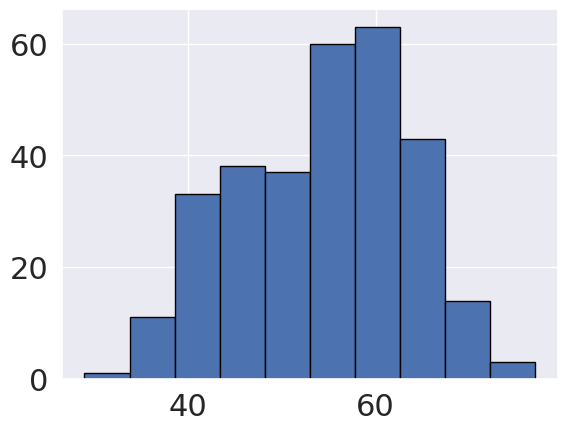

In [41]:
# The histagram of the Age variable was reached.
stroke_dataset["age"].hist(edgecolor = "black")

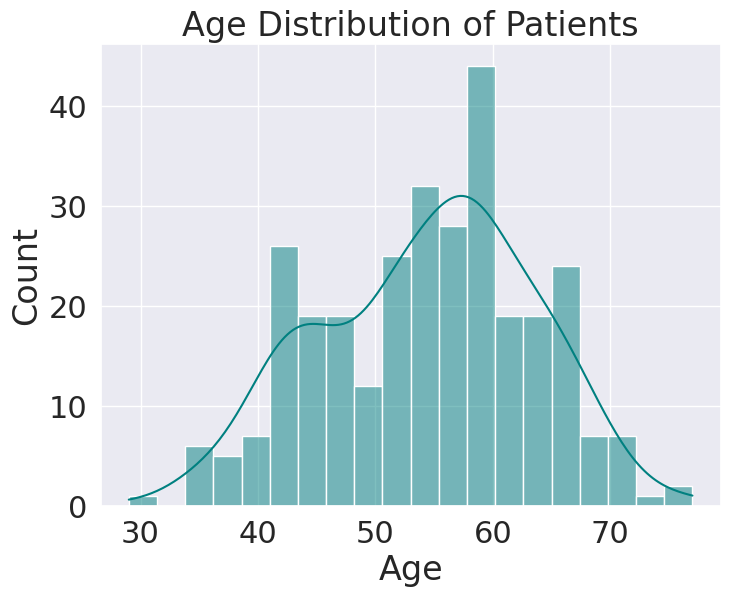

In [47]:
# If you want prettier plots with seaborn for specific columns
plt.figure(figsize=(8, 6))
sn.histplot(stroke_dataset['age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Feature Engineering:

In [58]:
df=stroke_dataset

In [59]:
# 1. Create Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# 2. Create Cholesterol Level Categories
df['chol_level'] = pd.cut(df['chol'], bins=[0, 200, 239, 600],
                          labels=['Normal', 'Borderline High', 'High'])

# 3. Binary Feature: High Blood Pressure (trestbps > 140 mmHg)
df['high_bp'] = np.where(df['trestbps'] > 140, 1, 0)

# 4. Interaction Feature: Age * Max Heart Rate (thalach)
df['age_thalach_interaction'] = df['age'] * df['thalach']

# 8. Oldpeak Categorization
df['oldpeak_cat'] = pd.cut(df['oldpeak'], bins=[-1, 0, 1, 6], labels=['None', 'Mild', 'Severe'])

# 9. High Cholesterol Flag
df['high_chol'] = np.where(df['chol'] > 240, 1, 0)

# 10. Sex * Age Interaction
df['sex_age'] = df['sex'] * df['age']


In [60]:
df.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,...,chol_level,high_bp,age_thalach_interaction,chol_age_ratio,thalach_pct,exang_age,oldpeak_cat,high_chol,sex_age,vessels_thal_score
0,0,67,1,0,100,299,0,0,125,1,...,High,0,8375,4.462687,1.865672,67,Mild,1,67,NaN
1,1,46,0,1,105,204,0,1,172,0,...,Borderline High,0,7912,4.434783,3.739130,0,None,0,0,NaN
2,2,53,0,0,130,264,0,0,143,0,...,High,0,7579,4.981132,2.698113,0,Mild,1,0,NaN
3,3,50,1,2,129,196,0,1,163,0,...,Normal,0,8150,3.920000,3.260000,0,None,0,50,NaN
4,4,67,1,0,160,286,0,0,108,1,...,High,1,7236,4.268657,1.611940,67,Severe,1,67,NaN
5,5,45,1,1,128,308,0,0,170,0,...,High,0,7650,6.844444,3.777778,0,None,1,45,NaN
6,6,58,1,2,112,230,0,0,165,0,...,Borderline High,0,9570,3.965517,2.844828,0,Severe,0,58,3.0
7,7,60,1,0,130,253,0,1,144,1,...,High,0,8640,4.216667,2.400000,60,Severe,1,60,3.0
8,8,44,1,2,140,235,0,0,180,0,...,Borderline High,0,7920,5.340909,4.090909,0,None,0,44,NaN
9,9,42,0,0,102,265,0,0,122,0,...,High,0,5124,6.309524,2.904762,0,Mild,1,0,NaN
